# I. Problem Framing

- The business objective to be achieved is to get a prediction system that can be used to find out which customers will churn and the factors that occur.


- The output to be generated is a prediction of the churn status of a customer. If you can predict which customer will churn, you can help the marketing team to develop marketing strategies in an effort to avoid losses in the form of losing customers.


- The machine learning approach that is applied this time is supervised learning in the form of classification problems. The system will predict a predetermined label (churn).


- The performance measure that will be used to help determine the quality of the final result is accuracy to determine the percentage of prediction success. Recall and precision will also be used to find out where the prediction error is.


- If the model incorrectly to predicts, the risk that stakeholders can experience is in the form of incorrectly giving promos to customers who do not churn, therefore, the promos provided will be in vain and will increase marketing costs. In addition, customers who actually will churn, but the model predicts that the customer is considered not churn, then these customers will not get the promo. Therefore, the customer may actually quit and this will result in the loss of a customer.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
import warnings

warnings.filterwarnings("ignore")

In [2]:
df_ecommerce = pd.read_excel('e-commerce2.xlsx')

## II. Exploratory Data Analysis

In [3]:
df_ecommerce

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [4]:
df_ecommerce.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [5]:
df_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

There are 5630 rows and 20 columns in this dataset, which consists of 5 categorical columns and 15 numerical columns

In [6]:
# Checking duplicate value from the datasets
df_duplicate = df_ecommerce.duplicated()
df_duplicate[df_duplicate == True].value_counts()

Series([], dtype: int64)

There is no duplicate data on datasets

In [7]:
df_ecommerce.drop('CustomerID',axis='columns',inplace=True)

Drop the CustomerID column because it will definitely not be used as a feature

#### Feature Engineering - Adding new variable

In [8]:
# Generating new features from cashback amount divided order count
df_ecommerce['avg_cashbk_per_order'] = df_ecommerce['CashbackAmount'] / df_ecommerce['OrderCount']

In [11]:
# Checking missing values 
df_ecommerce.isna().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
avg_cashbk_per_order           258
dtype: int64

In [12]:
# Calculate the percentage of each missing value
for i in range(len(df_ecommerce.columns)):
    missing_data = df_ecommerce[df_ecommerce.columns[i]].isna().sum()
    perc = missing_data / len(df_ecommerce) * 100
    print('>%d,  Missing value: %d, percentage %.2f%%' % (i, missing_data, perc))

>0,  Missing value: 0, percentage 0.00%
>1,  Missing value: 264, percentage 4.69%
>2,  Missing value: 0, percentage 0.00%
>3,  Missing value: 0, percentage 0.00%
>4,  Missing value: 251, percentage 4.46%
>5,  Missing value: 0, percentage 0.00%
>6,  Missing value: 0, percentage 0.00%
>7,  Missing value: 255, percentage 4.53%
>8,  Missing value: 0, percentage 0.00%
>9,  Missing value: 0, percentage 0.00%
>10,  Missing value: 0, percentage 0.00%
>11,  Missing value: 0, percentage 0.00%
>12,  Missing value: 0, percentage 0.00%
>13,  Missing value: 0, percentage 0.00%
>14,  Missing value: 265, percentage 4.71%
>15,  Missing value: 256, percentage 4.55%
>16,  Missing value: 258, percentage 4.58%
>17,  Missing value: 307, percentage 5.45%
>18,  Missing value: 0, percentage 0.00%
>19,  Missing value: 258, percentage 4.58%


There are 7 columns whose data has missing values, and the percentage of these missing values range from 4.53% - 5.45%,

#### Numerical Features

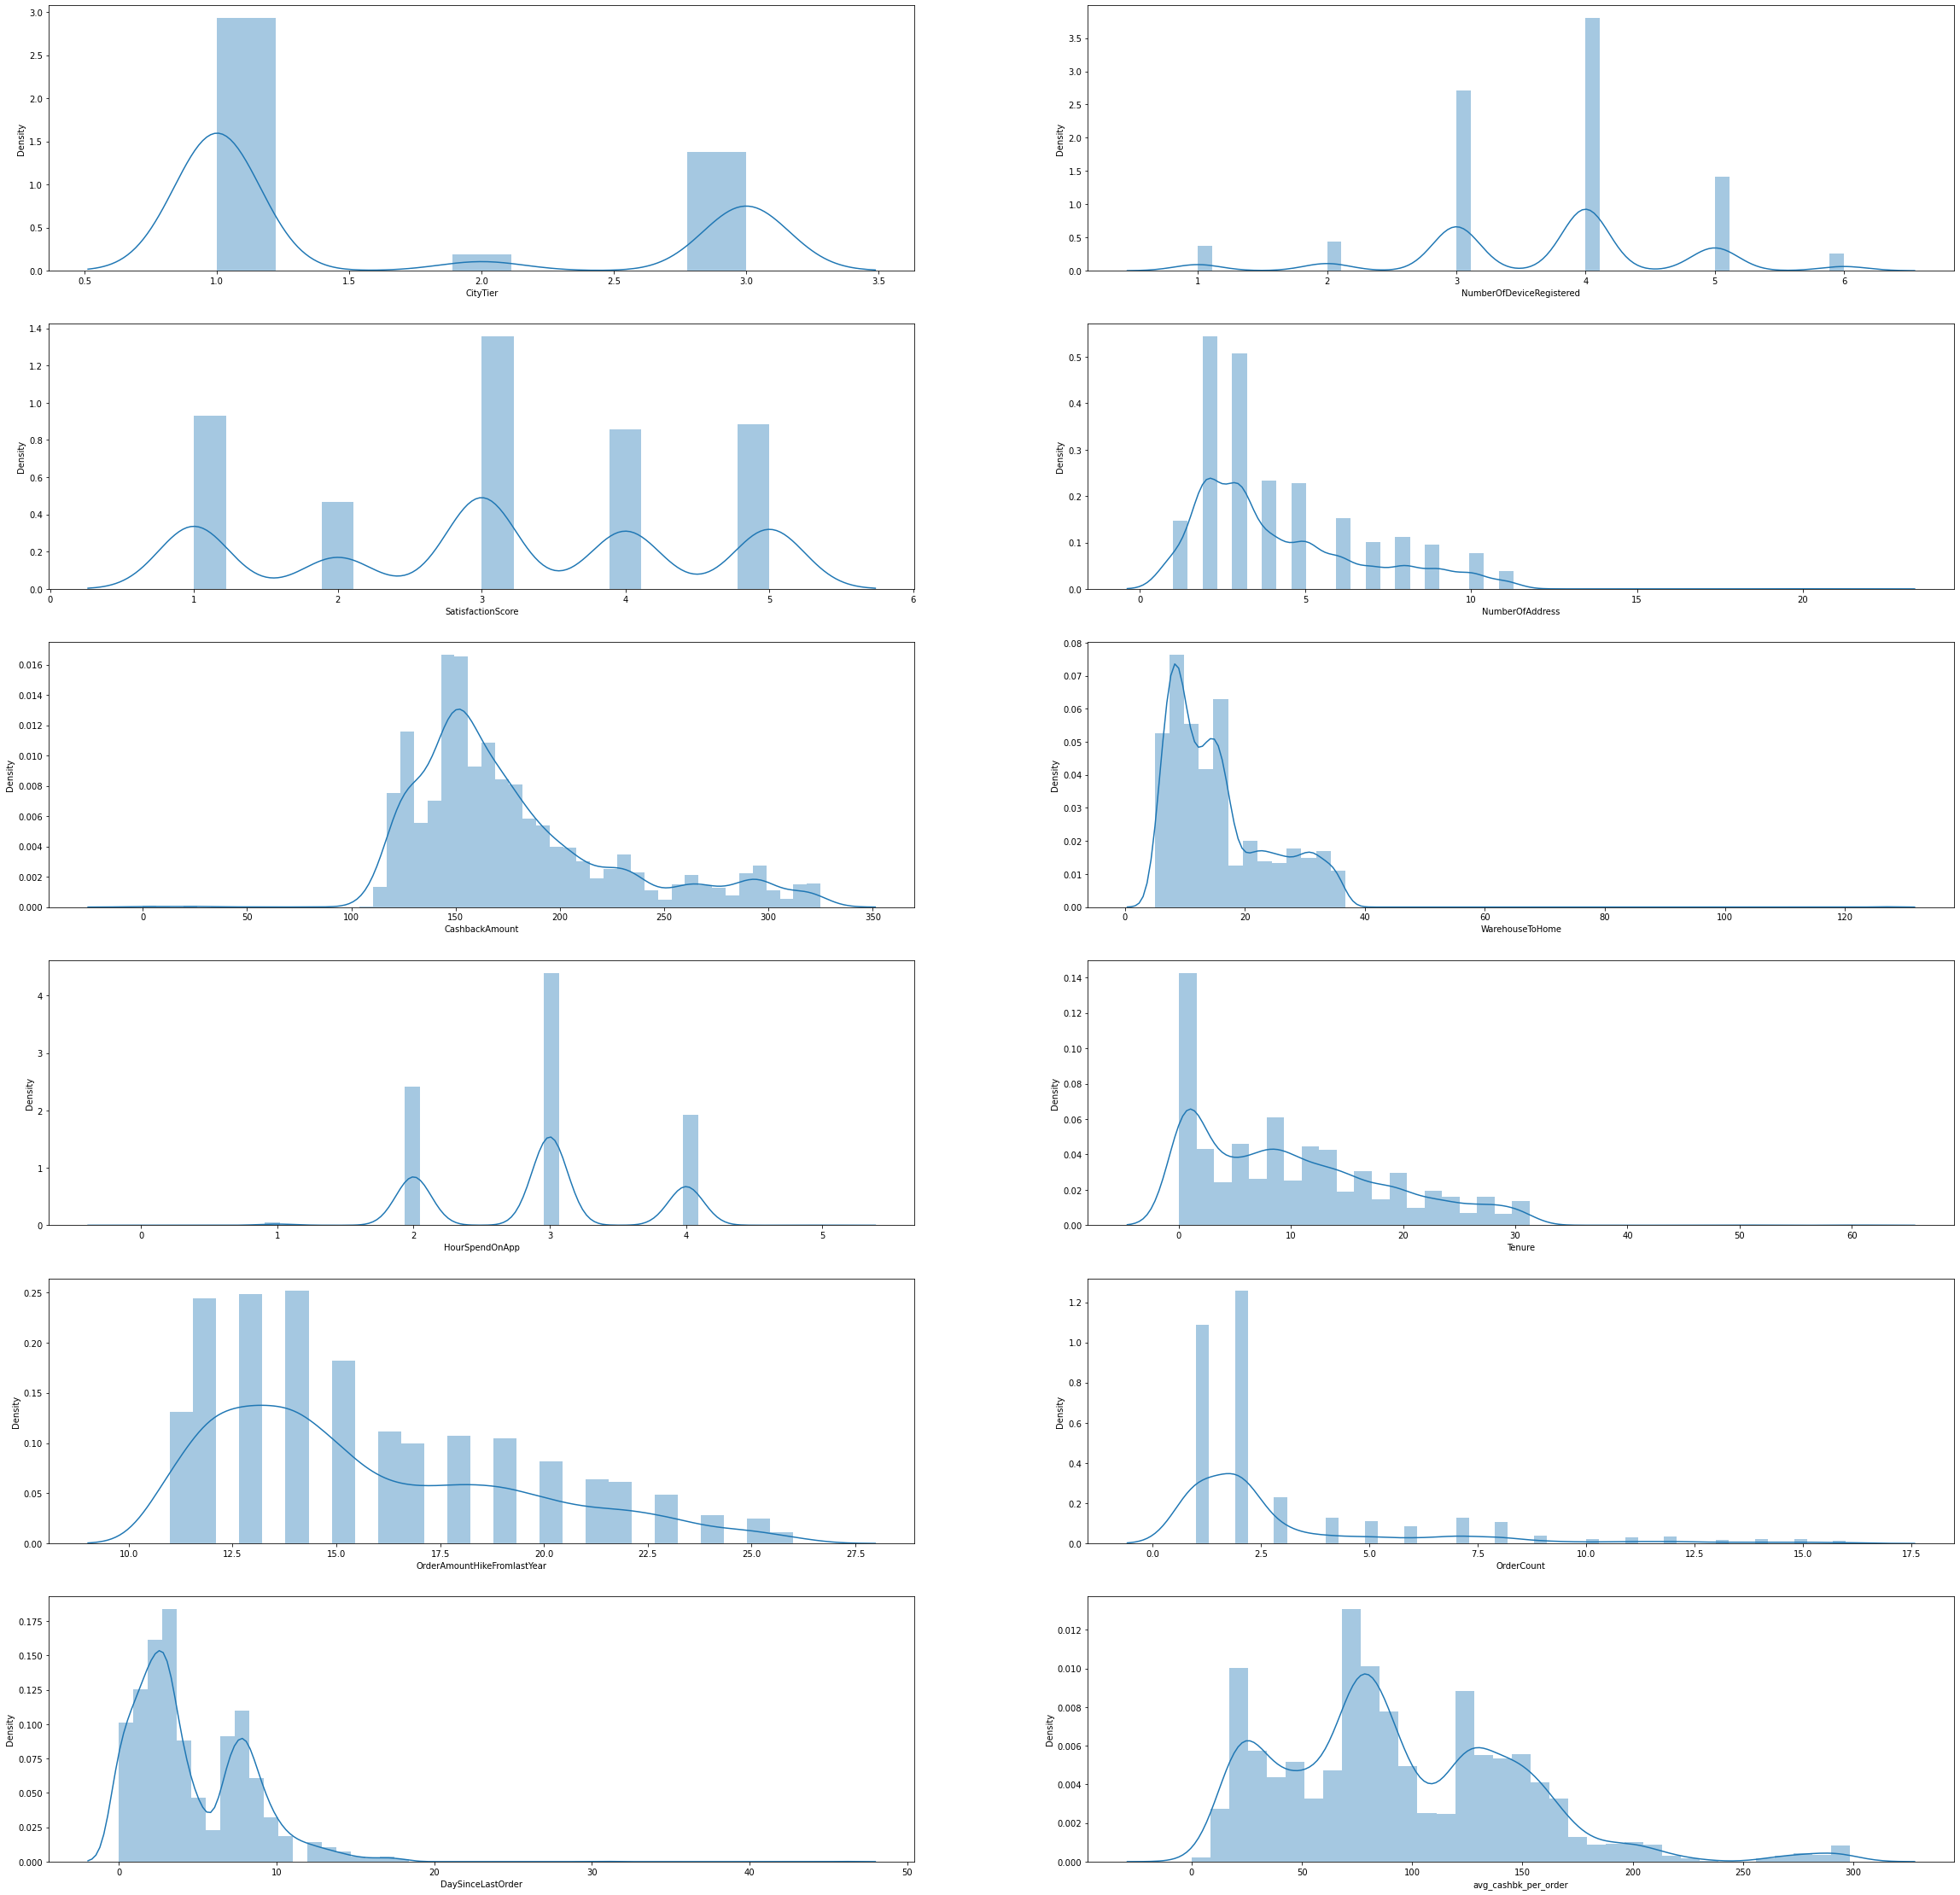

In [13]:
# The distribution of numerical variables
num = ['CityTier','NumberOfDeviceRegistered', 
            'SatisfactionScore', 'NumberOfAddress', 'CashbackAmount',
           'WarehouseToHome', 'HourSpendOnApp', 'Tenure','OrderAmountHikeFromlastYear',
               'OrderCount', 'DaySinceLastOrder', 'avg_cashbk_per_order']
fig, ax = plt.subplots(6, 2, figsize=(40, 40))
for i, subplot in zip(num, ax.flatten()):
    sns.distplot(df_ecommerce[i], ax=subplot)

The distribution of numerical variables tends to be skewed. To solve the missing value, we can use the median.

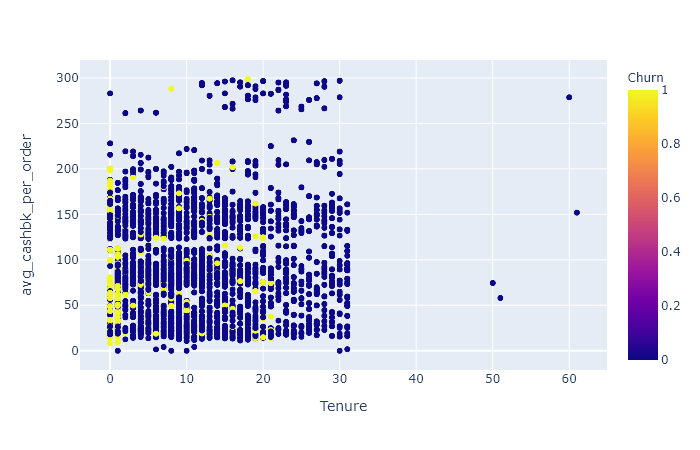

In [14]:
# Show who will churn between tenure & average cashback per order
fig = px.scatter(data_frame=df_ecommerce,
                 x='Tenure',
                 y='avg_cashbk_per_order',
                 color='Churn')
fig.show('png')

- Customers who have a short tenure and the average amount of cashback per order is low will tend to churned.
- Otherwise, customers with the longer tenure tend to be more loyal

#### Binary Categorical Features

In [15]:
# Checking the categorical column that has two variable values
columns = df_ecommerce.columns
binary_cols = []
for col in columns:
    if df_ecommerce[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
        
binary_cols

['Churn', 'Gender', 'Complain']

There is a categorical column that has two variable values (or class)

#### Exploring Categorical Features

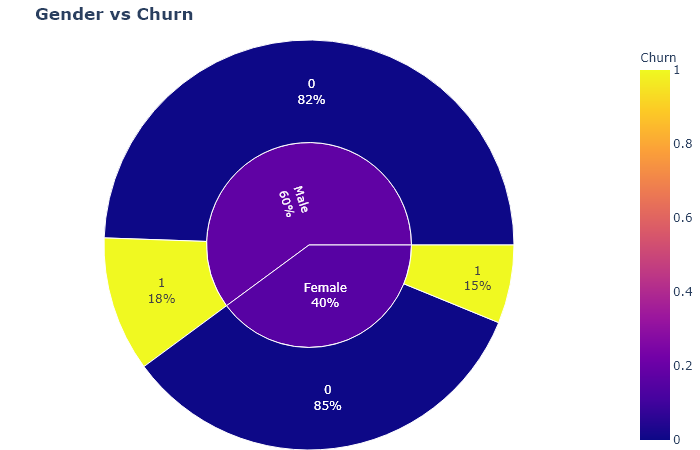

In [16]:
# Visualize gender variable by churn
fig = px.sunburst(data_frame=df_ecommerce,
                  path=['Gender', 'Churn'],
                  color='Churn',
                  title='<b>Gender vs Churn</b>'
                 )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show('png')

- There are 20% more male customers than female customers.
- Female customers are 3% more loyal than male customers.

Prediction Power : 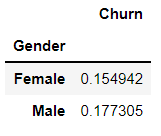

The mean churn rates for men and women are slightly different indicating that the gender variable bring a valuable prediction power to a model. Therefore, I would use the gender variable in a machine learning model.

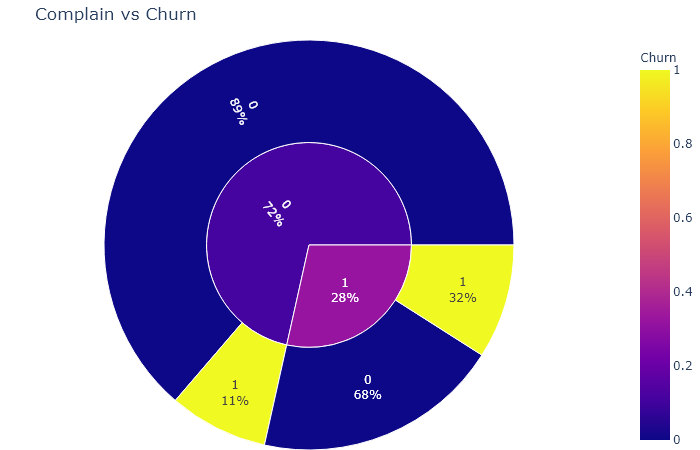

In [17]:
# Visualize complain variable by churn
fig = px.sunburst(data_frame=df_ecommerce,
                  path=['Complain', 'Churn'],
                  color='Churn',
                  title='Complain vs Churn'
                 )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show('png')

- 28% (1604) of the customers have complained, and 32% of them have been churned
- 72% (4026) of the customers do not complain. But about 11% of them are churned

Prediction Power:
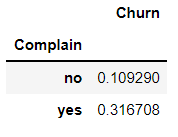

- This indicates that customers who have made complaints are more likely to do churned. 
- Otherwise, customers who never complain are more likely to be loyal.

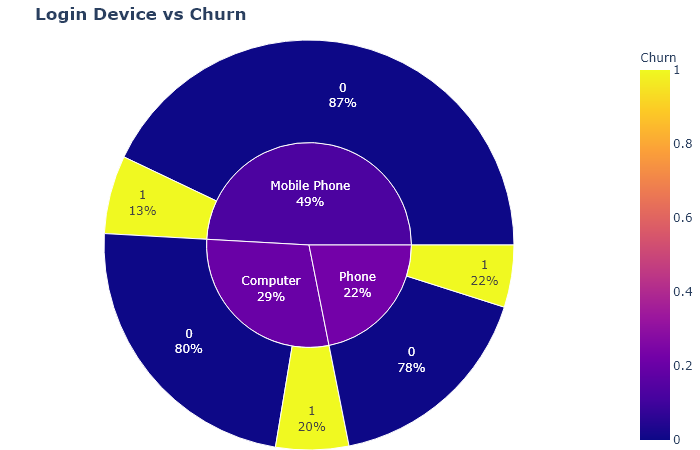

In [18]:
# Visualize preferredLoginDevice variable by churn
fig = px.sunburst(data_frame=df_ecommerce,
                  path=['PreferredLoginDevice', 'Churn'],
                  color='Churn',
                  title='<b>Login Device vs Churn</b>'
                 )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show('png')

- 49% (2765) of the customers are use mobile phone devices.
- 29% (1634) of the customers are use computer devices.
- 22% (1231) of the customers are use telephone devices.

Prediction Power: 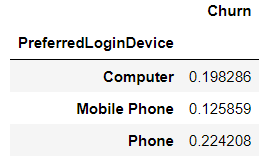

- Based on the ratio per device category, customers who use telephone devices are indicated to be disloyal.
- Customers who use Mobile Phone device indicated to be more loyal.

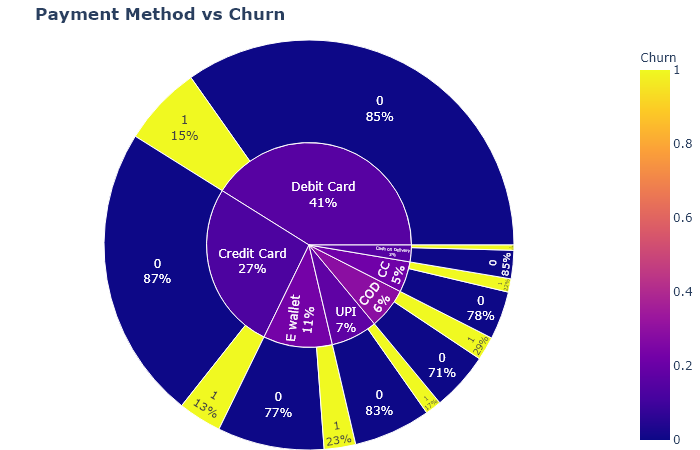

In [19]:
# Visualize payment method variable by churn
fig = px.sunburst(data_frame=df_ecommerce,
                  path=['PreferredPaymentMode', 'Churn'],
                  color='Churn',
                  title='<b>Payment Method vs Churn</b>'
                 )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show('png')

- 41% (2314) of the customers are use Debit Card of payment method.
- 27% (1501) of the customers are use Credit Card of payment method.
- 11% (614) of the customers are use E-Wallet of payment method.
- 7% (414) of the customers are use UPI of payment method.
- 6% (365) of the customers are use COD of payment method.
- 5% (273) of the customers are use CC of payment method.
- 3% (148) of the customers are use Cash on Delivery of payment method.

Prediction Power:
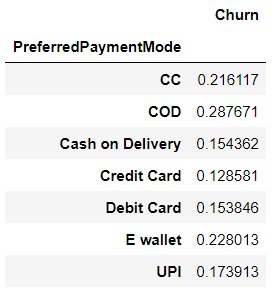

- Based on the ratio per payment method, customers who use COD of payment method are indicated to be disloyal. 
- Customers who use Credit Card of payment method indicated to be more loyal.

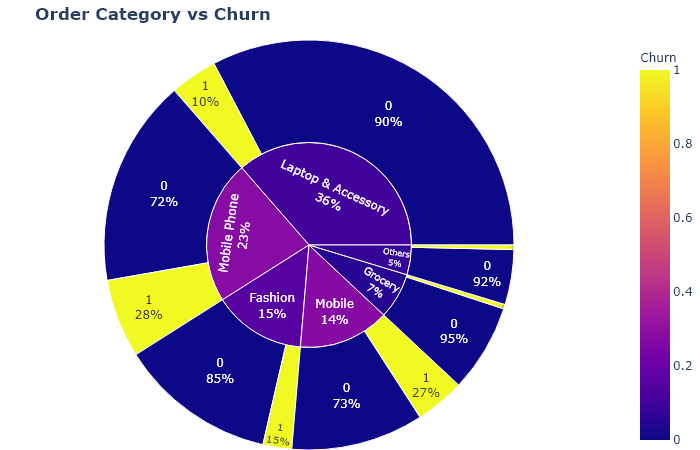

In [20]:
# Visualize order category variable by churn
fig = px.sunburst(data_frame=df_ecommerce,
                  path=['PreferedOrderCat', 'Churn'],
                  color='Churn',
                  title='<b>Order Category vs Churn</b>'
                 )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show('png')

- 36% (2050) of the customers who ordered Laptop & Accessory.
- 23% (1271) of the customers who ordered Mobile Phone.
- 15% (826) of the customers who ordered Fashion.
- 14% (809) of the customers who ordered Mobile.
- 7% (410) of the customers who ordered Grocery.
- 5% (264) of the customers who ordered Others.

Prediction Power:
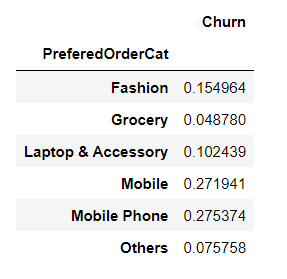

- Based on the ratio per order category, customers who ordered Mobile Phone & Mobile are indicated to be disloyal. 
- Customers who ordered Grocery indicated to be more loyal.

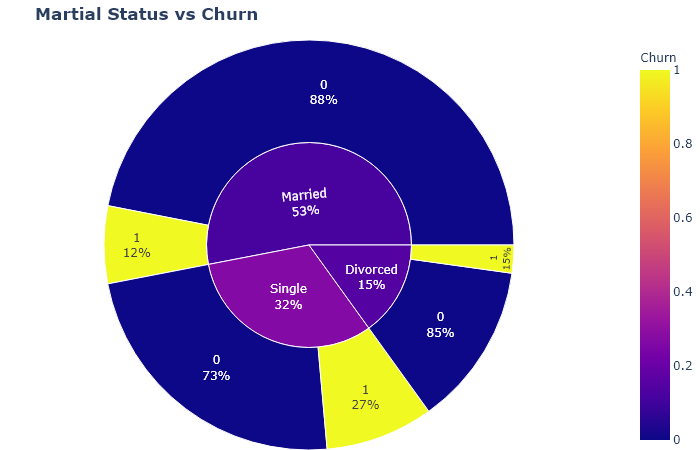

In [21]:
# Visualize martial status variable by churn
fig = px.sunburst(data_frame=df_ecommerce,
                  path=['MaritalStatus', 'Churn'],
                  color='Churn',
                  title='<b>Martial Status vs Churn</b>'
                 )

fig.update_traces(textinfo='label+percent parent')
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show('png')

- 53% (2986) of the customers who Married.
- 32% (1796) of the customers who Single.
- 15% (848) of the customers who Divorced.

Prediction Power: 
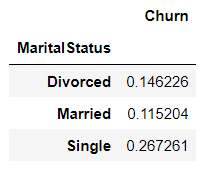

- Based on the ratio per martial status category, customers who have single status are indicated to be disloyal. 
- Customers who have married status indicated to be more loyal.

#### Analysing Churn by Each Variable

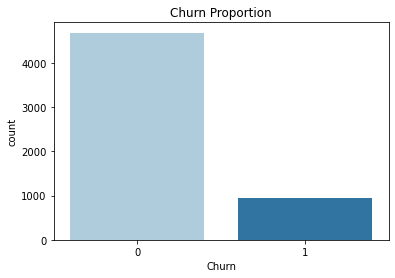

In [22]:
# Checking for proportions of churn variable
sns.countplot(x='Churn',
              data=df_ecommerce,
              palette='Paired')
plt.title('Churn Proportion');

In [23]:
df_ecommerce['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

There is an imbalanced class distribution on the target variable. Positive class (Churn=1) is much less than negative class (Churn=0). Imbalanced class distributions influence the performance of a machine learning model negatively. We will use upsampling or downsampling to overcome this issue.

In [24]:
# Percentage of customer churn
Churn_perc = round((df_ecommerce['Churn'][df_ecommerce['Churn']==1].count()*100/df_ecommerce['Churn'][df_ecommerce['Churn']==0].count()),2)
print('The average customer churn is:', Churn_perc,'%')

The average customer churn is: 20.25 %


Source : https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data

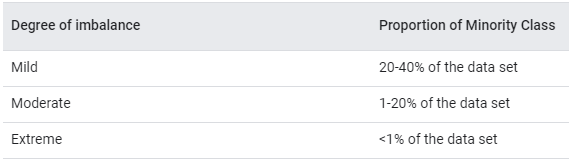

Based on the 'Proportion of Minority Class', the class imbalance that occurs is in the Mild category, which can still do downsampling to the majority class

In [25]:
# Checking for prediction power of each numerical variables
df_ecommerce[['Churn','Tenure','CityTier','NumberOfDeviceRegistered', 
            'SatisfactionScore', 'NumberOfAddress', 'CashbackAmount'
             ,'WarehouseToHome', 'HourSpendOnApp','OrderAmountHikeFromlastYear',
               'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'avg_cashbk_per_order']].groupby(['Churn']).mean()

,Tenure,CityTier,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,CashbackAmount,WarehouseToHome,HourSpendOnApp,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,avg_cashbk_per_order
Churn,,,,,,,,,,,,,
0,11.502334,1.619821,3.639257,3.001282,4.162965,180.635203,15.353931,2.925530,15.724893,1.758232,3.046601,4.807406,95.576332
1,3.379469,1.827004,3.934599,3.390295,4.466245,160.370928,17.134259,2.961798,15.627409,1.717021,2.823656,3.236018,88.139500


#### Outliers

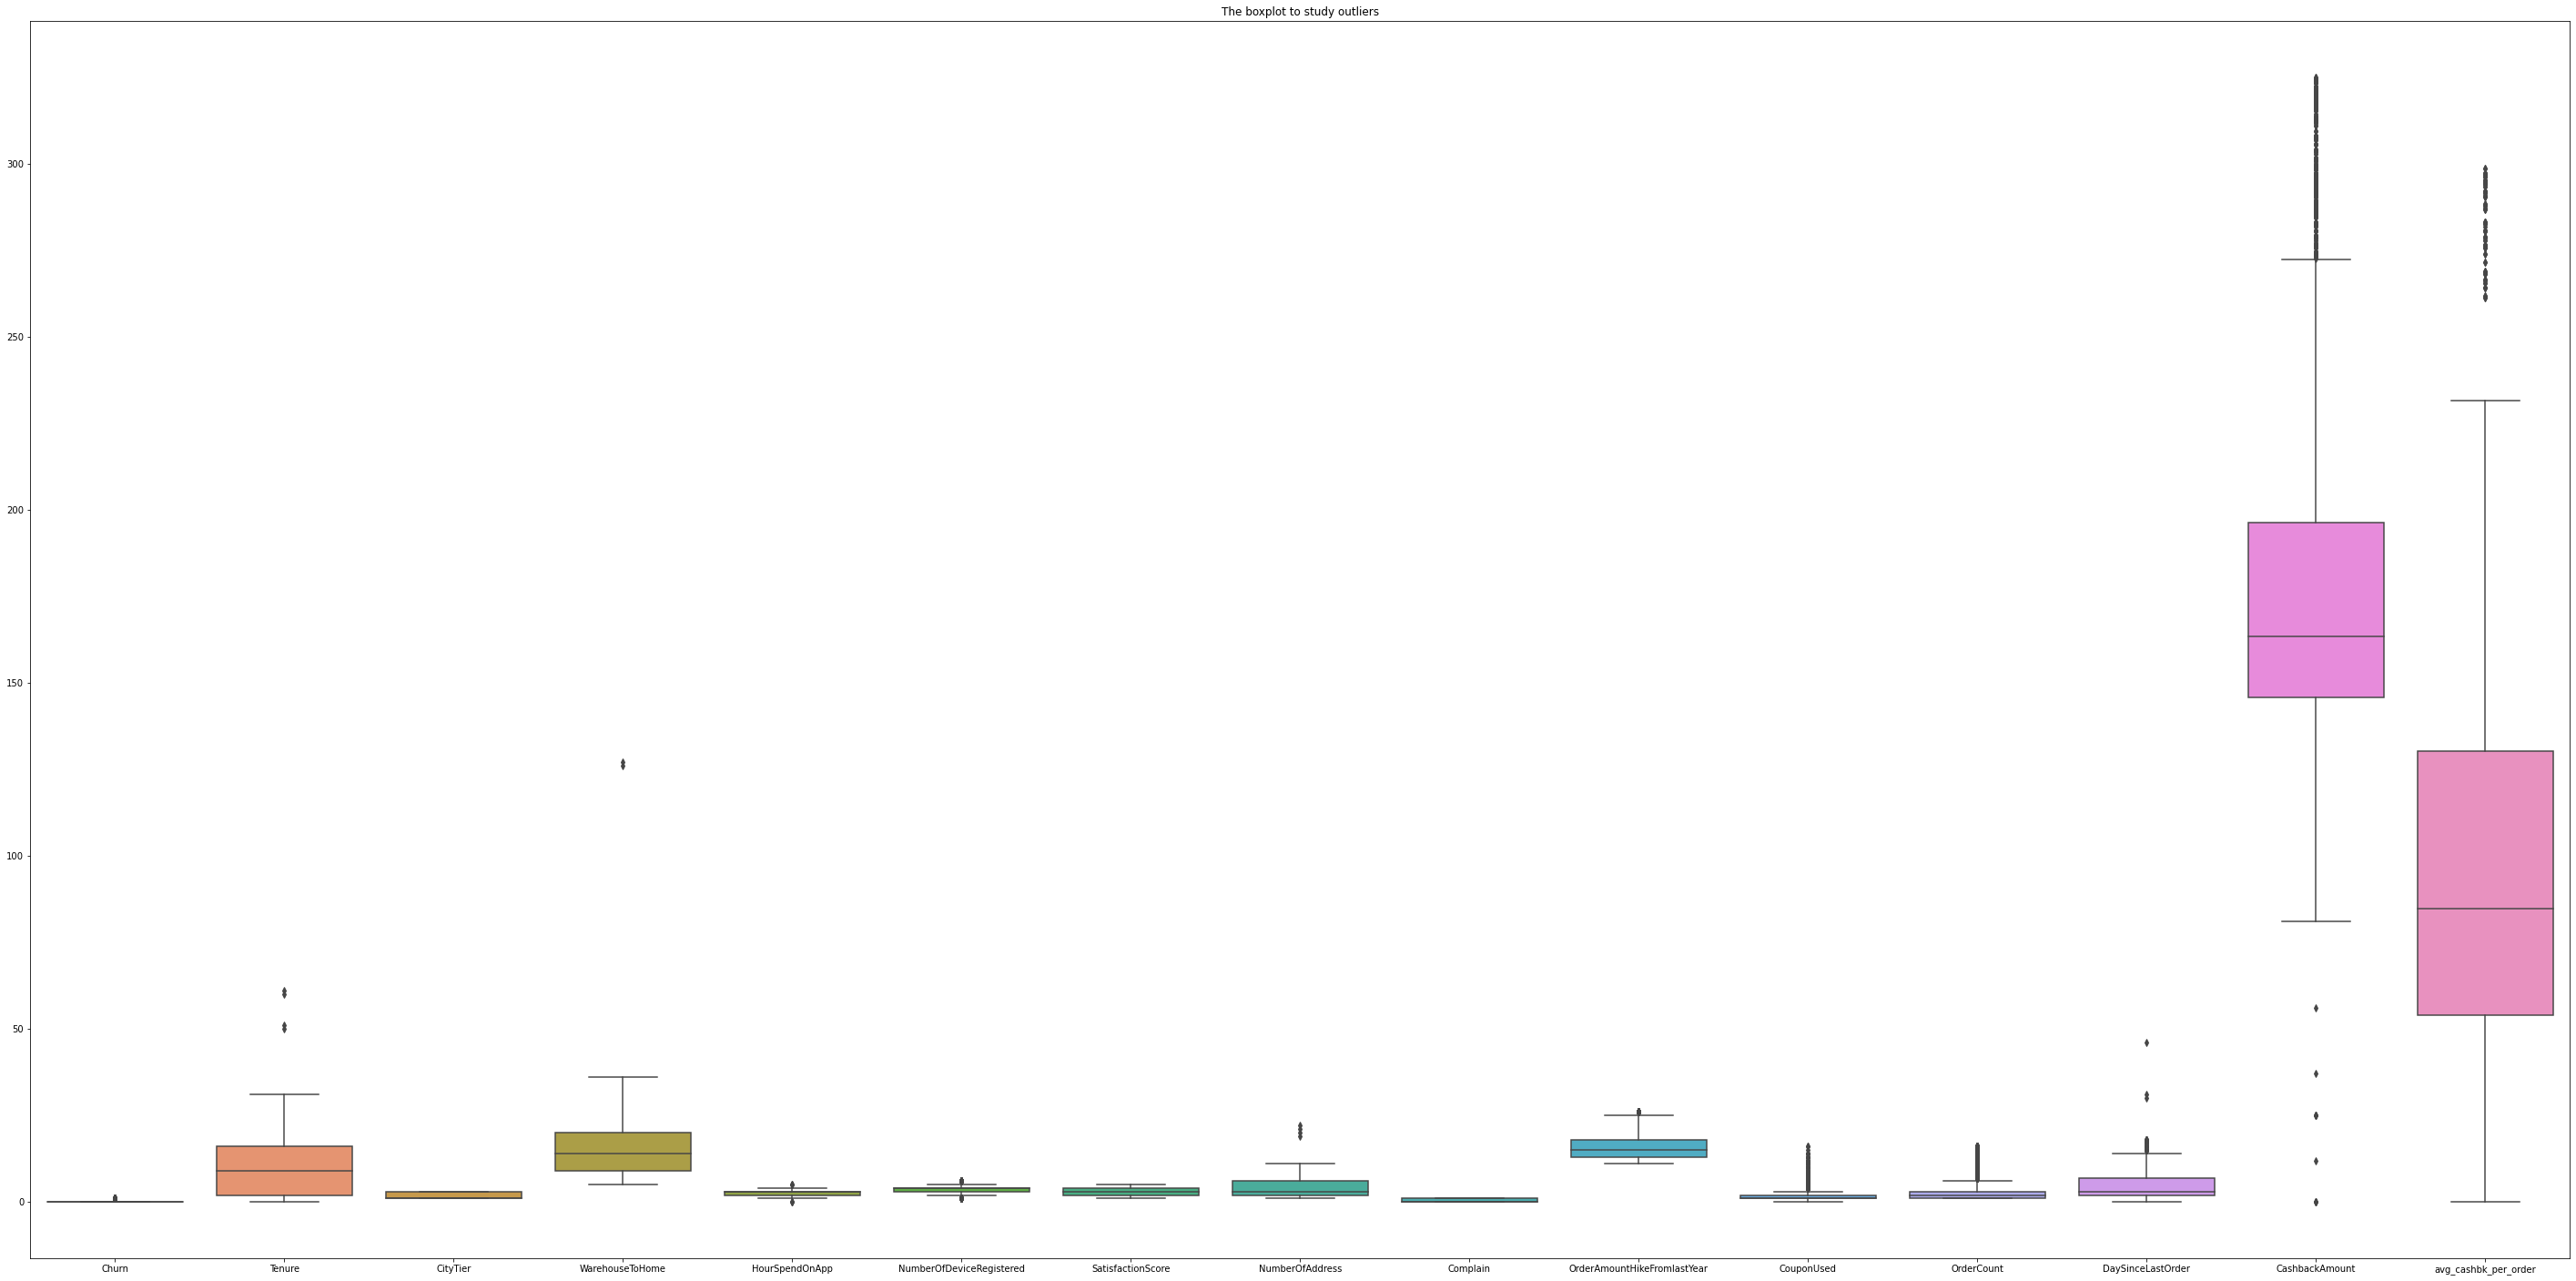

In [26]:
# Checking for outliers
plt.figure(figsize=(50,25))
sns.boxplot(data=df_ecommerce)
plt.title('The boxplot to study outliers');

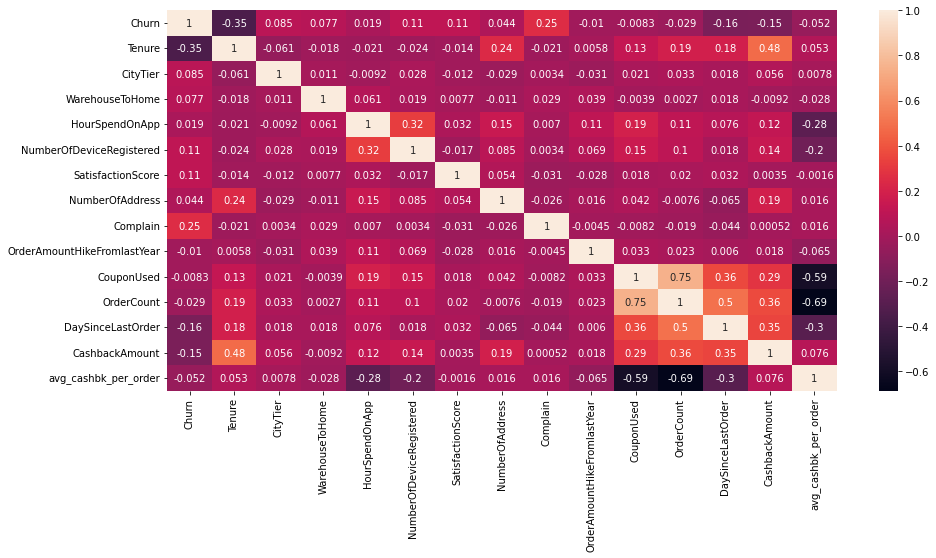

In [27]:
# Checking for relation features of each variables
plt.figure(figsize=(15,7))
sns.heatmap(df_ecommerce.corr(), annot=True);

CouponUsed and OrderCount variables indicate that they have multicollinearity, so the approach we take is to take out CouponUsed as a feature

## III. Data Preprocessing

#### Handle missing value 
We handle missing value with median, because the graph showed skewed distribution 

In [28]:
# For handling the missing values
for i in df_ecommerce.columns:
    if df_ecommerce[i].isnull().sum() > 0:
        df_ecommerce[i].fillna(df_ecommerce[i].median(),inplace=True)

In [29]:
# Checking missing values after fill the missing values with median
df_ecommerce.isna().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
avg_cashbk_per_order           0
dtype: int64

#### Splitting

In [30]:
# We splitting the datasets into training set and test set
from sklearn.model_selection import train_test_split

X = df_ecommerce.drop(['Churn'], axis=1)
y = df_ecommerce['Churn']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14, stratify = y)

#### Downsampling

We use downsampling with RandomUnderSampler to handle imbalance data.

In [31]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

We need to encode all categorical features, and rescale the numerical features.

In [32]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier

ctg_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
           'PreferedOrderCat', 'MaritalStatus']

num_cols = ['CityTier','NumberOfDeviceRegistered', 
            'SatisfactionScore', 'NumberOfAddress', 'CashbackAmount',
           'WarehouseToHome', 'HourSpendOnApp', 'Tenure','OrderAmountHikeFromlastYear',
               'OrderCount', 'DaySinceLastOrder', 'avg_cashbk_per_order', 'Complain']


full_pipeline = ColumnTransformer([
    ('ctg_transformer', OneHotEncoder(), ctg_cols),
    ('num_transformer', RobustScaler(), num_cols)
])

full_pipeline_log = Pipeline([
    ('full_pipeline',full_pipeline),
    ('log_reg',LogisticRegression())
])

full_pipeline_knn = Pipeline([
    ('full_pipeline',full_pipeline),
    ('knn',KNeighborsClassifier())
])

full_pipeline_dt = Pipeline([
    ('full_pipeline',full_pipeline),
    ('dt',DecisionTreeClassifier())
])

full_pipeline_ada = Pipeline([
    ('full_pipeline',full_pipeline),
    ('ada',AdaBoostClassifier())
])

full_pipeline_cb = Pipeline([
    ('full_pipeline',full_pipeline),
    ('cb',CatBoostClassifier())
])

In [33]:
#  
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
df = pd.DataFrame(full_pipeline.fit_transform(X_train_under, y_train_under))
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,-1.0,-0.25,-0.719660,-0.615385,-1.0,0.272727,-0.8,-0.5,0.000000,0.573103,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.0,0.0,0.25,-0.524057,-0.307692,0.0,1.272727,0.8,-0.5,-0.500000,0.722229,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.468860,1.615385,1.0,0.090909,-0.4,2.0,0.833333,-0.881809,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0,0.00,3.567868,0.000000,0.0,0.818182,1.6,2.0,1.333333,-0.488033,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,1.75,1.544677,-0.230769,1.0,1.363636,-0.4,6.5,0.000000,-1.110452,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.5,0.00,-0.359305,0.076923,0.0,-0.454545,-0.4,0.0,-0.333333,-0.253090,0.0
1512,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,0.5,-0.25,1.338160,1.615385,-1.0,0.363636,-0.6,3.5,0.000000,-0.965572,1.0
1513,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.50,-0.026654,0.076923,-1.0,0.000000,-0.4,-0.5,0.000000,1.101444,0.0
1514,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.50,2.232436,0.615385,0.0,-0.454545,-0.4,3.0,0.833333,-0.831793,1.0


## IV. Model Training

We'll select one of these algorithms :

1. Logistic Regression (Could be the simplest model we could have)
2. Decision Tree (Easy to understand and interpret)
3. K-Nearest Neighbor (This model is good for handling outliers)
4. AdaBoost (In each iteration, trying to provide excellent fit)
5. CatBoost (Easy to use, efficient, and works very well with categorical variables.)

In [34]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

warnings.filterwarnings('ignore')

models = [full_pipeline_log, full_pipeline_dt, full_pipeline_knn, full_pipeline_ada, full_pipeline_cb]

# prepare CV result summary table
df_results = pd.DataFrame()

for pipeline_ in models:
    current_step_name = list(pipeline_.named_steps.keys())[1]
    cv_scores = cross_validate(pipeline_,X_train_under,y_train_under, cv=5, scoring=('accuracy',
                                                                           'precision',
                                                                           'recall', 'f1', 'roc_auc'), 
                               return_train_score=True)
    df_results = df_results.append({
        'Model': pipeline_.named_steps[current_step_name].__class__.__name__,
        'Accuracy (train)': cv_scores['train_accuracy'].mean(),
        'Accuracy (val)': cv_scores['test_accuracy'].mean(),
        'Precision (train)': cv_scores['train_precision'].mean(),
        'Precision (val)': cv_scores['test_precision'].mean(),
        'Recall (train)': cv_scores['train_recall'].mean(),
        'Recall (val)': cv_scores['test_recall'].mean(),
        'F1 (train)': cv_scores['train_f1'].mean(),
        'F1 (val)': cv_scores['test_f1'].mean(),
        'roc_auc (train)': cv_scores['train_roc_auc'].mean(),
        'roc_auc (val)': cv_scores['test_roc_auc'].mean()
    }, ignore_index=True)
    
df_results

Learning rate set to 0.011184
0:	learn: 0.6868552	total: 133ms	remaining: 2m 12s
1:	learn: 0.6800954	total: 136ms	remaining: 1m 7s
2:	learn: 0.6743302	total: 139ms	remaining: 46.3s
3:	learn: 0.6683610	total: 143ms	remaining: 35.6s
4:	learn: 0.6629362	total: 147ms	remaining: 29.2s
5:	learn: 0.6578049	total: 149ms	remaining: 24.7s
6:	learn: 0.6534735	total: 152ms	remaining: 21.5s
7:	learn: 0.6481401	total: 155ms	remaining: 19.2s
8:	learn: 0.6430573	total: 158ms	remaining: 17.4s
9:	learn: 0.6390588	total: 161ms	remaining: 16s
10:	learn: 0.6344761	total: 164ms	remaining: 14.8s
11:	learn: 0.6300889	total: 168ms	remaining: 13.8s
12:	learn: 0.6267402	total: 171ms	remaining: 13s
13:	learn: 0.6219562	total: 176ms	remaining: 12.4s
14:	learn: 0.6176779	total: 180ms	remaining: 11.8s
15:	learn: 0.6135361	total: 183ms	remaining: 11.3s
16:	learn: 0.6096397	total: 188ms	remaining: 10.9s
17:	learn: 0.6050043	total: 191ms	remaining: 10.4s
18:	learn: 0.6011320	total: 196ms	remaining: 10.1s
19:	learn: 0.5

177:	learn: 0.3497197	total: 867ms	remaining: 4s
178:	learn: 0.3491154	total: 871ms	remaining: 4s
179:	learn: 0.3482854	total: 876ms	remaining: 3.99s
180:	learn: 0.3474761	total: 881ms	remaining: 3.98s
181:	learn: 0.3467665	total: 885ms	remaining: 3.98s
182:	learn: 0.3460605	total: 890ms	remaining: 3.97s
183:	learn: 0.3456248	total: 894ms	remaining: 3.97s
184:	learn: 0.3446915	total: 899ms	remaining: 3.96s
185:	learn: 0.3441294	total: 903ms	remaining: 3.95s
186:	learn: 0.3433523	total: 907ms	remaining: 3.94s
187:	learn: 0.3427674	total: 912ms	remaining: 3.94s
188:	learn: 0.3422575	total: 916ms	remaining: 3.93s
189:	learn: 0.3416602	total: 919ms	remaining: 3.92s
190:	learn: 0.3409297	total: 923ms	remaining: 3.91s
191:	learn: 0.3401714	total: 928ms	remaining: 3.9s
192:	learn: 0.3395612	total: 932ms	remaining: 3.9s
193:	learn: 0.3390804	total: 936ms	remaining: 3.89s
194:	learn: 0.3384495	total: 941ms	remaining: 3.88s
195:	learn: 0.3378091	total: 945ms	remaining: 3.88s
196:	learn: 0.337191

343:	learn: 0.2697140	total: 1.56s	remaining: 2.97s
344:	learn: 0.2690480	total: 1.56s	remaining: 2.97s
345:	learn: 0.2688423	total: 1.57s	remaining: 2.96s
346:	learn: 0.2683528	total: 1.57s	remaining: 2.96s
347:	learn: 0.2680658	total: 1.57s	remaining: 2.95s
348:	learn: 0.2678747	total: 1.58s	remaining: 2.95s
349:	learn: 0.2675818	total: 1.58s	remaining: 2.94s
350:	learn: 0.2673556	total: 1.59s	remaining: 2.94s
351:	learn: 0.2668643	total: 1.59s	remaining: 2.93s
352:	learn: 0.2663110	total: 1.59s	remaining: 2.92s
353:	learn: 0.2660035	total: 1.6s	remaining: 2.92s
354:	learn: 0.2657938	total: 1.6s	remaining: 2.91s
355:	learn: 0.2654987	total: 1.61s	remaining: 2.91s
356:	learn: 0.2652553	total: 1.61s	remaining: 2.9s
357:	learn: 0.2647566	total: 1.61s	remaining: 2.9s
358:	learn: 0.2645560	total: 1.62s	remaining: 2.89s
359:	learn: 0.2641215	total: 1.62s	remaining: 2.88s
360:	learn: 0.2638317	total: 1.63s	remaining: 2.88s
361:	learn: 0.2637865	total: 1.63s	remaining: 2.87s
362:	learn: 0.26

515:	learn: 0.2175082	total: 2.25s	remaining: 2.11s
516:	learn: 0.2173370	total: 2.25s	remaining: 2.1s
517:	learn: 0.2168830	total: 2.26s	remaining: 2.1s
518:	learn: 0.2165945	total: 2.26s	remaining: 2.1s
519:	learn: 0.2162014	total: 2.27s	remaining: 2.09s
520:	learn: 0.2160389	total: 2.27s	remaining: 2.09s
521:	learn: 0.2158855	total: 2.27s	remaining: 2.08s
522:	learn: 0.2156376	total: 2.28s	remaining: 2.08s
523:	learn: 0.2152845	total: 2.28s	remaining: 2.07s
524:	learn: 0.2149092	total: 2.29s	remaining: 2.07s
525:	learn: 0.2144313	total: 2.29s	remaining: 2.06s
526:	learn: 0.2142922	total: 2.29s	remaining: 2.06s
527:	learn: 0.2140842	total: 2.3s	remaining: 2.06s
528:	learn: 0.2136940	total: 2.3s	remaining: 2.05s
529:	learn: 0.2134091	total: 2.31s	remaining: 2.04s
530:	learn: 0.2131492	total: 2.31s	remaining: 2.04s
531:	learn: 0.2128808	total: 2.31s	remaining: 2.04s
532:	learn: 0.2126009	total: 2.32s	remaining: 2.03s
533:	learn: 0.2124207	total: 2.32s	remaining: 2.03s
534:	learn: 0.212

687:	learn: 0.1765299	total: 2.94s	remaining: 1.33s
688:	learn: 0.1764363	total: 2.95s	remaining: 1.33s
689:	learn: 0.1763062	total: 2.95s	remaining: 1.33s
690:	learn: 0.1761484	total: 2.96s	remaining: 1.32s
691:	learn: 0.1759837	total: 2.96s	remaining: 1.32s
692:	learn: 0.1758375	total: 2.96s	remaining: 1.31s
693:	learn: 0.1756183	total: 2.97s	remaining: 1.31s
694:	learn: 0.1753582	total: 2.97s	remaining: 1.3s
695:	learn: 0.1751246	total: 2.98s	remaining: 1.3s
696:	learn: 0.1749673	total: 2.98s	remaining: 1.3s
697:	learn: 0.1747685	total: 2.98s	remaining: 1.29s
698:	learn: 0.1745403	total: 2.99s	remaining: 1.29s
699:	learn: 0.1741937	total: 2.99s	remaining: 1.28s
700:	learn: 0.1740722	total: 3s	remaining: 1.28s
701:	learn: 0.1737996	total: 3s	remaining: 1.27s
702:	learn: 0.1736091	total: 3s	remaining: 1.27s
703:	learn: 0.1734959	total: 3.01s	remaining: 1.26s
704:	learn: 0.1732147	total: 3.01s	remaining: 1.26s
705:	learn: 0.1730089	total: 3.02s	remaining: 1.26s
706:	learn: 0.1728437	to

859:	learn: 0.1430286	total: 3.64s	remaining: 593ms
860:	learn: 0.1428574	total: 3.64s	remaining: 588ms
861:	learn: 0.1426782	total: 3.65s	remaining: 584ms
862:	learn: 0.1425631	total: 3.65s	remaining: 580ms
863:	learn: 0.1422846	total: 3.66s	remaining: 576ms
864:	learn: 0.1421205	total: 3.66s	remaining: 571ms
865:	learn: 0.1418982	total: 3.66s	remaining: 567ms
866:	learn: 0.1417814	total: 3.67s	remaining: 563ms
867:	learn: 0.1415417	total: 3.67s	remaining: 558ms
868:	learn: 0.1413676	total: 3.68s	remaining: 554ms
869:	learn: 0.1412160	total: 3.68s	remaining: 550ms
870:	learn: 0.1410700	total: 3.68s	remaining: 546ms
871:	learn: 0.1409233	total: 3.69s	remaining: 541ms
872:	learn: 0.1407482	total: 3.69s	remaining: 537ms
873:	learn: 0.1405546	total: 3.7s	remaining: 533ms
874:	learn: 0.1403584	total: 3.7s	remaining: 529ms
875:	learn: 0.1402432	total: 3.71s	remaining: 524ms
876:	learn: 0.1400643	total: 3.71s	remaining: 520ms
877:	learn: 0.1399832	total: 3.71s	remaining: 516ms
878:	learn: 0.

43:	learn: 0.5156677	total: 161ms	remaining: 3.51s
44:	learn: 0.5127858	total: 166ms	remaining: 3.51s
45:	learn: 0.5104002	total: 170ms	remaining: 3.53s
46:	learn: 0.5080561	total: 175ms	remaining: 3.54s
47:	learn: 0.5052483	total: 179ms	remaining: 3.55s
48:	learn: 0.5026270	total: 182ms	remaining: 3.54s
49:	learn: 0.5004191	total: 187ms	remaining: 3.54s
50:	learn: 0.4983307	total: 190ms	remaining: 3.54s
51:	learn: 0.4957318	total: 194ms	remaining: 3.54s
52:	learn: 0.4937966	total: 198ms	remaining: 3.53s
53:	learn: 0.4913256	total: 201ms	remaining: 3.52s
54:	learn: 0.4894389	total: 204ms	remaining: 3.51s
55:	learn: 0.4867284	total: 208ms	remaining: 3.51s
56:	learn: 0.4842243	total: 212ms	remaining: 3.5s
57:	learn: 0.4819886	total: 216ms	remaining: 3.51s
58:	learn: 0.4796399	total: 220ms	remaining: 3.51s
59:	learn: 0.4779577	total: 224ms	remaining: 3.5s
60:	learn: 0.4762892	total: 227ms	remaining: 3.5s
61:	learn: 0.4745797	total: 232ms	remaining: 3.5s
62:	learn: 0.4734172	total: 236ms	r

223:	learn: 0.3219108	total: 857ms	remaining: 2.97s
224:	learn: 0.3212574	total: 862ms	remaining: 2.97s
225:	learn: 0.3208001	total: 866ms	remaining: 2.97s
226:	learn: 0.3202895	total: 870ms	remaining: 2.96s
227:	learn: 0.3197091	total: 874ms	remaining: 2.96s
228:	learn: 0.3190835	total: 878ms	remaining: 2.96s
229:	learn: 0.3185646	total: 882ms	remaining: 2.95s
230:	learn: 0.3178841	total: 886ms	remaining: 2.95s
231:	learn: 0.3172101	total: 890ms	remaining: 2.94s
232:	learn: 0.3163064	total: 894ms	remaining: 2.94s
233:	learn: 0.3157914	total: 897ms	remaining: 2.94s
234:	learn: 0.3152921	total: 901ms	remaining: 2.93s
235:	learn: 0.3145086	total: 906ms	remaining: 2.93s
236:	learn: 0.3140277	total: 911ms	remaining: 2.93s
237:	learn: 0.3136755	total: 915ms	remaining: 2.93s
238:	learn: 0.3130673	total: 918ms	remaining: 2.92s
239:	learn: 0.3125443	total: 922ms	remaining: 2.92s
240:	learn: 0.3121185	total: 926ms	remaining: 2.92s
241:	learn: 0.3118495	total: 930ms	remaining: 2.91s
242:	learn: 

406:	learn: 0.2481394	total: 1.55s	remaining: 2.26s
407:	learn: 0.2478507	total: 1.55s	remaining: 2.25s
408:	learn: 0.2476286	total: 1.55s	remaining: 2.25s
409:	learn: 0.2472278	total: 1.56s	remaining: 2.24s
410:	learn: 0.2468730	total: 1.56s	remaining: 2.24s
411:	learn: 0.2464887	total: 1.56s	remaining: 2.23s
412:	learn: 0.2461511	total: 1.57s	remaining: 2.23s
413:	learn: 0.2458673	total: 1.57s	remaining: 2.23s
414:	learn: 0.2455581	total: 1.58s	remaining: 2.22s
415:	learn: 0.2451312	total: 1.58s	remaining: 2.22s
416:	learn: 0.2447610	total: 1.58s	remaining: 2.21s
417:	learn: 0.2445024	total: 1.59s	remaining: 2.21s
418:	learn: 0.2441806	total: 1.59s	remaining: 2.21s
419:	learn: 0.2437977	total: 1.59s	remaining: 2.2s
420:	learn: 0.2435917	total: 1.6s	remaining: 2.2s
421:	learn: 0.2432162	total: 1.6s	remaining: 2.19s
422:	learn: 0.2431969	total: 1.6s	remaining: 2.19s
423:	learn: 0.2429409	total: 1.61s	remaining: 2.18s
424:	learn: 0.2425596	total: 1.61s	remaining: 2.18s
425:	learn: 0.242

593:	learn: 0.1996290	total: 2.24s	remaining: 1.53s
594:	learn: 0.1993535	total: 2.25s	remaining: 1.53s
595:	learn: 0.1991902	total: 2.25s	remaining: 1.52s
596:	learn: 0.1989810	total: 2.25s	remaining: 1.52s
597:	learn: 0.1987094	total: 2.26s	remaining: 1.52s
598:	learn: 0.1984793	total: 2.26s	remaining: 1.51s
599:	learn: 0.1982536	total: 2.26s	remaining: 1.51s
600:	learn: 0.1979629	total: 2.27s	remaining: 1.5s
601:	learn: 0.1978568	total: 2.27s	remaining: 1.5s
602:	learn: 0.1976358	total: 2.27s	remaining: 1.5s
603:	learn: 0.1973976	total: 2.28s	remaining: 1.49s
604:	learn: 0.1971762	total: 2.28s	remaining: 1.49s
605:	learn: 0.1969946	total: 2.29s	remaining: 1.49s
606:	learn: 0.1968806	total: 2.29s	remaining: 1.48s
607:	learn: 0.1965809	total: 2.29s	remaining: 1.48s
608:	learn: 0.1964775	total: 2.3s	remaining: 1.48s
609:	learn: 0.1963065	total: 2.3s	remaining: 1.47s
610:	learn: 0.1960355	total: 2.3s	remaining: 1.47s
611:	learn: 0.1957914	total: 2.31s	remaining: 1.46s
612:	learn: 0.1954

779:	learn: 0.1604289	total: 2.94s	remaining: 828ms
780:	learn: 0.1602616	total: 2.94s	remaining: 824ms
781:	learn: 0.1600591	total: 2.94s	remaining: 820ms
782:	learn: 0.1599071	total: 2.95s	remaining: 817ms
783:	learn: 0.1597345	total: 2.95s	remaining: 813ms
784:	learn: 0.1595907	total: 2.95s	remaining: 809ms
785:	learn: 0.1593523	total: 2.96s	remaining: 806ms
786:	learn: 0.1592640	total: 2.96s	remaining: 802ms
787:	learn: 0.1590524	total: 2.97s	remaining: 798ms
788:	learn: 0.1587680	total: 2.97s	remaining: 794ms
789:	learn: 0.1586508	total: 2.97s	remaining: 791ms
790:	learn: 0.1585240	total: 2.98s	remaining: 787ms
791:	learn: 0.1582763	total: 2.98s	remaining: 783ms
792:	learn: 0.1580701	total: 2.98s	remaining: 779ms
793:	learn: 0.1578835	total: 2.99s	remaining: 776ms
794:	learn: 0.1577705	total: 2.99s	remaining: 772ms
795:	learn: 0.1576935	total: 3s	remaining: 768ms
796:	learn: 0.1574920	total: 3s	remaining: 764ms
797:	learn: 0.1572889	total: 3s	remaining: 760ms
798:	learn: 0.1571855

962:	learn: 0.1323439	total: 3.61s	remaining: 139ms
963:	learn: 0.1321815	total: 3.62s	remaining: 135ms
964:	learn: 0.1318854	total: 3.62s	remaining: 131ms
965:	learn: 0.1317728	total: 3.63s	remaining: 128ms
966:	learn: 0.1315995	total: 3.63s	remaining: 124ms
967:	learn: 0.1315191	total: 3.63s	remaining: 120ms
968:	learn: 0.1314113	total: 3.64s	remaining: 116ms
969:	learn: 0.1312911	total: 3.64s	remaining: 113ms
970:	learn: 0.1311805	total: 3.65s	remaining: 109ms
971:	learn: 0.1308931	total: 3.65s	remaining: 105ms
972:	learn: 0.1306871	total: 3.65s	remaining: 101ms
973:	learn: 0.1306125	total: 3.66s	remaining: 97.6ms
974:	learn: 0.1304799	total: 3.66s	remaining: 93.9ms
975:	learn: 0.1303684	total: 3.67s	remaining: 90.1ms
976:	learn: 0.1303230	total: 3.67s	remaining: 86.4ms
977:	learn: 0.1302618	total: 3.67s	remaining: 82.6ms
978:	learn: 0.1301332	total: 3.68s	remaining: 78.9ms
979:	learn: 0.1299738	total: 3.68s	remaining: 75.1ms
980:	learn: 0.1297814	total: 3.68s	remaining: 71.4ms
981:

153:	learn: 0.3603438	total: 518ms	remaining: 2.85s
154:	learn: 0.3596876	total: 522ms	remaining: 2.84s
155:	learn: 0.3592603	total: 525ms	remaining: 2.84s
156:	learn: 0.3584014	total: 529ms	remaining: 2.84s
157:	learn: 0.3577448	total: 533ms	remaining: 2.84s
158:	learn: 0.3572228	total: 536ms	remaining: 2.83s
159:	learn: 0.3570708	total: 539ms	remaining: 2.83s
160:	learn: 0.3561601	total: 542ms	remaining: 2.82s
161:	learn: 0.3555429	total: 546ms	remaining: 2.82s
162:	learn: 0.3547166	total: 549ms	remaining: 2.82s
163:	learn: 0.3541001	total: 553ms	remaining: 2.82s
164:	learn: 0.3533769	total: 557ms	remaining: 2.82s
165:	learn: 0.3527000	total: 560ms	remaining: 2.81s
166:	learn: 0.3518171	total: 563ms	remaining: 2.81s
167:	learn: 0.3512023	total: 567ms	remaining: 2.81s
168:	learn: 0.3506339	total: 570ms	remaining: 2.8s
169:	learn: 0.3500239	total: 574ms	remaining: 2.8s
170:	learn: 0.3494423	total: 578ms	remaining: 2.8s
171:	learn: 0.3488146	total: 581ms	remaining: 2.8s
172:	learn: 0.34

342:	learn: 0.2651449	total: 1.21s	remaining: 2.32s
343:	learn: 0.2648649	total: 1.21s	remaining: 2.32s
344:	learn: 0.2645942	total: 1.22s	remaining: 2.31s
345:	learn: 0.2642686	total: 1.22s	remaining: 2.31s
346:	learn: 0.2637054	total: 1.23s	remaining: 2.31s
347:	learn: 0.2634478	total: 1.23s	remaining: 2.3s
348:	learn: 0.2629563	total: 1.23s	remaining: 2.3s
349:	learn: 0.2625403	total: 1.24s	remaining: 2.29s
350:	learn: 0.2621919	total: 1.24s	remaining: 2.29s
351:	learn: 0.2618183	total: 1.24s	remaining: 2.29s
352:	learn: 0.2615943	total: 1.25s	remaining: 2.28s
353:	learn: 0.2612647	total: 1.25s	remaining: 2.28s
354:	learn: 0.2608159	total: 1.25s	remaining: 2.28s
355:	learn: 0.2605927	total: 1.26s	remaining: 2.27s
356:	learn: 0.2603471	total: 1.26s	remaining: 2.27s
357:	learn: 0.2600431	total: 1.26s	remaining: 2.27s
358:	learn: 0.2596743	total: 1.27s	remaining: 2.26s
359:	learn: 0.2595183	total: 1.27s	remaining: 2.26s
360:	learn: 0.2591771	total: 1.27s	remaining: 2.25s
361:	learn: 0.

536:	learn: 0.2116211	total: 1.9s	remaining: 1.64s
537:	learn: 0.2112901	total: 1.91s	remaining: 1.64s
538:	learn: 0.2111532	total: 1.91s	remaining: 1.63s
539:	learn: 0.2108505	total: 1.91s	remaining: 1.63s
540:	learn: 0.2107348	total: 1.92s	remaining: 1.63s
541:	learn: 0.2105781	total: 1.92s	remaining: 1.62s
542:	learn: 0.2103662	total: 1.92s	remaining: 1.62s
543:	learn: 0.2101532	total: 1.93s	remaining: 1.61s
544:	learn: 0.2098035	total: 1.93s	remaining: 1.61s
545:	learn: 0.2095542	total: 1.93s	remaining: 1.61s
546:	learn: 0.2093309	total: 1.94s	remaining: 1.6s
547:	learn: 0.2089435	total: 1.94s	remaining: 1.6s
548:	learn: 0.2087953	total: 1.95s	remaining: 1.6s
549:	learn: 0.2085680	total: 1.95s	remaining: 1.59s
550:	learn: 0.2083788	total: 1.95s	remaining: 1.59s
551:	learn: 0.2079910	total: 1.96s	remaining: 1.59s
552:	learn: 0.2078601	total: 1.96s	remaining: 1.58s
553:	learn: 0.2077509	total: 1.96s	remaining: 1.58s
554:	learn: 0.2074041	total: 1.97s	remaining: 1.58s
555:	learn: 0.20

740:	learn: 0.1668863	total: 2.59s	remaining: 907ms
741:	learn: 0.1667159	total: 2.6s	remaining: 903ms
742:	learn: 0.1665825	total: 2.6s	remaining: 900ms
743:	learn: 0.1664590	total: 2.6s	remaining: 896ms
744:	learn: 0.1663610	total: 2.61s	remaining: 893ms
745:	learn: 0.1660943	total: 2.61s	remaining: 889ms
746:	learn: 0.1659100	total: 2.61s	remaining: 886ms
747:	learn: 0.1656907	total: 2.62s	remaining: 882ms
748:	learn: 0.1655611	total: 2.62s	remaining: 879ms
749:	learn: 0.1652842	total: 2.63s	remaining: 875ms
750:	learn: 0.1651468	total: 2.63s	remaining: 872ms
751:	learn: 0.1649838	total: 2.63s	remaining: 868ms
752:	learn: 0.1647499	total: 2.63s	remaining: 865ms
753:	learn: 0.1644905	total: 2.64s	remaining: 861ms
754:	learn: 0.1643234	total: 2.64s	remaining: 858ms
755:	learn: 0.1641957	total: 2.65s	remaining: 854ms
756:	learn: 0.1639856	total: 2.65s	remaining: 850ms
757:	learn: 0.1637986	total: 2.65s	remaining: 847ms
758:	learn: 0.1634963	total: 2.65s	remaining: 843ms
759:	learn: 0.1

951:	learn: 0.1327808	total: 3.29s	remaining: 166ms
952:	learn: 0.1325685	total: 3.29s	remaining: 162ms
953:	learn: 0.1324495	total: 3.29s	remaining: 159ms
954:	learn: 0.1322912	total: 3.3s	remaining: 155ms
955:	learn: 0.1321864	total: 3.3s	remaining: 152ms
956:	learn: 0.1320911	total: 3.3s	remaining: 148ms
957:	learn: 0.1319623	total: 3.31s	remaining: 145ms
958:	learn: 0.1318096	total: 3.31s	remaining: 142ms
959:	learn: 0.1316686	total: 3.31s	remaining: 138ms
960:	learn: 0.1314754	total: 3.32s	remaining: 135ms
961:	learn: 0.1314104	total: 3.32s	remaining: 131ms
962:	learn: 0.1312204	total: 3.32s	remaining: 128ms
963:	learn: 0.1310128	total: 3.33s	remaining: 124ms
964:	learn: 0.1307427	total: 3.33s	remaining: 121ms
965:	learn: 0.1306070	total: 3.33s	remaining: 117ms
966:	learn: 0.1304822	total: 3.34s	remaining: 114ms
967:	learn: 0.1302808	total: 3.34s	remaining: 110ms
968:	learn: 0.1301837	total: 3.34s	remaining: 107ms
969:	learn: 0.1300206	total: 3.35s	remaining: 103ms
970:	learn: 0.1

110:	learn: 0.3987726	total: 346ms	remaining: 2.77s
111:	learn: 0.3978402	total: 350ms	remaining: 2.78s
112:	learn: 0.3963954	total: 354ms	remaining: 2.78s
113:	learn: 0.3951330	total: 357ms	remaining: 2.78s
114:	learn: 0.3940769	total: 361ms	remaining: 2.77s
115:	learn: 0.3929595	total: 364ms	remaining: 2.77s
116:	learn: 0.3914753	total: 367ms	remaining: 2.77s
117:	learn: 0.3903427	total: 371ms	remaining: 2.77s
118:	learn: 0.3892174	total: 374ms	remaining: 2.77s
119:	learn: 0.3878134	total: 377ms	remaining: 2.77s
120:	learn: 0.3871453	total: 380ms	remaining: 2.76s
121:	learn: 0.3863544	total: 383ms	remaining: 2.76s
122:	learn: 0.3852722	total: 388ms	remaining: 2.76s
123:	learn: 0.3843390	total: 391ms	remaining: 2.76s
124:	learn: 0.3827850	total: 394ms	remaining: 2.76s
125:	learn: 0.3816719	total: 397ms	remaining: 2.76s
126:	learn: 0.3807497	total: 401ms	remaining: 2.75s
127:	learn: 0.3800742	total: 404ms	remaining: 2.75s
128:	learn: 0.3790693	total: 407ms	remaining: 2.75s
129:	learn: 

315:	learn: 0.2727806	total: 1.04s	remaining: 2.25s
316:	learn: 0.2724146	total: 1.04s	remaining: 2.24s
317:	learn: 0.2718365	total: 1.04s	remaining: 2.24s
318:	learn: 0.2716273	total: 1.05s	remaining: 2.24s
319:	learn: 0.2710405	total: 1.05s	remaining: 2.23s
320:	learn: 0.2706283	total: 1.05s	remaining: 2.23s
321:	learn: 0.2703011	total: 1.06s	remaining: 2.23s
322:	learn: 0.2698474	total: 1.06s	remaining: 2.22s
323:	learn: 0.2693534	total: 1.06s	remaining: 2.22s
324:	learn: 0.2687170	total: 1.07s	remaining: 2.21s
325:	learn: 0.2684468	total: 1.07s	remaining: 2.21s
326:	learn: 0.2681503	total: 1.07s	remaining: 2.21s
327:	learn: 0.2677479	total: 1.07s	remaining: 2.2s
328:	learn: 0.2669508	total: 1.08s	remaining: 2.2s
329:	learn: 0.2665274	total: 1.08s	remaining: 2.2s
330:	learn: 0.2661230	total: 1.08s	remaining: 2.19s
331:	learn: 0.2657714	total: 1.09s	remaining: 2.19s
332:	learn: 0.2655916	total: 1.09s	remaining: 2.19s
333:	learn: 0.2653009	total: 1.1s	remaining: 2.19s
334:	learn: 0.26

476:	learn: 0.2180351	total: 1.56s	remaining: 1.71s
477:	learn: 0.2180230	total: 1.56s	remaining: 1.7s
478:	learn: 0.2178341	total: 1.56s	remaining: 1.7s
479:	learn: 0.2171819	total: 1.57s	remaining: 1.7s
480:	learn: 0.2168455	total: 1.57s	remaining: 1.69s
481:	learn: 0.2164994	total: 1.57s	remaining: 1.69s
482:	learn: 0.2161103	total: 1.58s	remaining: 1.69s
483:	learn: 0.2157820	total: 1.58s	remaining: 1.69s
484:	learn: 0.2153584	total: 1.58s	remaining: 1.68s
485:	learn: 0.2152231	total: 1.59s	remaining: 1.68s
486:	learn: 0.2150480	total: 1.59s	remaining: 1.68s
487:	learn: 0.2148648	total: 1.59s	remaining: 1.67s
488:	learn: 0.2146523	total: 1.6s	remaining: 1.67s
489:	learn: 0.2142704	total: 1.6s	remaining: 1.67s
490:	learn: 0.2141003	total: 1.6s	remaining: 1.66s
491:	learn: 0.2136991	total: 1.61s	remaining: 1.66s
492:	learn: 0.2135144	total: 1.61s	remaining: 1.66s
493:	learn: 0.2132732	total: 1.61s	remaining: 1.65s
494:	learn: 0.2131126	total: 1.62s	remaining: 1.65s
495:	learn: 0.2128

678:	learn: 0.1689868	total: 2.25s	remaining: 1.06s
679:	learn: 0.1688357	total: 2.25s	remaining: 1.06s
680:	learn: 0.1686381	total: 2.25s	remaining: 1.05s
681:	learn: 0.1684216	total: 2.26s	remaining: 1.05s
682:	learn: 0.1682115	total: 2.26s	remaining: 1.05s
683:	learn: 0.1679487	total: 2.26s	remaining: 1.04s
684:	learn: 0.1677562	total: 2.27s	remaining: 1.04s
685:	learn: 0.1675922	total: 2.27s	remaining: 1.04s
686:	learn: 0.1673930	total: 2.27s	remaining: 1.03s
687:	learn: 0.1671141	total: 2.28s	remaining: 1.03s
688:	learn: 0.1669154	total: 2.28s	remaining: 1.03s
689:	learn: 0.1667341	total: 2.28s	remaining: 1.03s
690:	learn: 0.1665970	total: 2.29s	remaining: 1.02s
691:	learn: 0.1663551	total: 2.29s	remaining: 1.02s
692:	learn: 0.1660443	total: 2.29s	remaining: 1.02s
693:	learn: 0.1658638	total: 2.3s	remaining: 1.01s
694:	learn: 0.1656492	total: 2.3s	remaining: 1.01s
695:	learn: 0.1653999	total: 2.3s	remaining: 1.01s
696:	learn: 0.1650999	total: 2.31s	remaining: 1s
697:	learn: 0.1649

836:	learn: 0.1393225	total: 2.76s	remaining: 538ms
837:	learn: 0.1390330	total: 2.77s	remaining: 535ms
838:	learn: 0.1387808	total: 2.77s	remaining: 532ms
839:	learn: 0.1386196	total: 2.77s	remaining: 529ms
840:	learn: 0.1383505	total: 2.78s	remaining: 525ms
841:	learn: 0.1382640	total: 2.78s	remaining: 522ms
842:	learn: 0.1381543	total: 2.79s	remaining: 519ms
843:	learn: 0.1379872	total: 2.79s	remaining: 516ms
844:	learn: 0.1378455	total: 2.79s	remaining: 512ms
845:	learn: 0.1376467	total: 2.8s	remaining: 509ms
846:	learn: 0.1375123	total: 2.8s	remaining: 506ms
847:	learn: 0.1373731	total: 2.8s	remaining: 503ms
848:	learn: 0.1372074	total: 2.81s	remaining: 499ms
849:	learn: 0.1369922	total: 2.81s	remaining: 496ms
850:	learn: 0.1369001	total: 2.81s	remaining: 493ms
851:	learn: 0.1368271	total: 2.82s	remaining: 490ms
852:	learn: 0.1366222	total: 2.82s	remaining: 486ms
853:	learn: 0.1364817	total: 2.82s	remaining: 483ms
854:	learn: 0.1363386	total: 2.83s	remaining: 480ms
855:	learn: 0.1

0:	learn: 0.6865928	total: 3.27ms	remaining: 3.26s
1:	learn: 0.6798634	total: 6.5ms	remaining: 3.24s
2:	learn: 0.6732100	total: 9.69ms	remaining: 3.22s
3:	learn: 0.6678299	total: 12.5ms	remaining: 3.11s
4:	learn: 0.6618573	total: 15.4ms	remaining: 3.07s
5:	learn: 0.6570778	total: 18.5ms	remaining: 3.06s
6:	learn: 0.6518161	total: 21.5ms	remaining: 3.06s
7:	learn: 0.6460819	total: 24.5ms	remaining: 3.04s
8:	learn: 0.6406160	total: 27.3ms	remaining: 3s
9:	learn: 0.6354859	total: 29.9ms	remaining: 2.96s
10:	learn: 0.6292472	total: 32.8ms	remaining: 2.95s
11:	learn: 0.6245064	total: 35.5ms	remaining: 2.92s
12:	learn: 0.6193789	total: 38.5ms	remaining: 2.92s
13:	learn: 0.6144219	total: 41.2ms	remaining: 2.9s
14:	learn: 0.6099018	total: 43.9ms	remaining: 2.88s
15:	learn: 0.6070640	total: 45.7ms	remaining: 2.81s
16:	learn: 0.6026561	total: 48.4ms	remaining: 2.8s
17:	learn: 0.5975789	total: 51.3ms	remaining: 2.8s
18:	learn: 0.5926786	total: 54.2ms	remaining: 2.8s
19:	learn: 0.5886416	total: 56

206:	learn: 0.3201027	total: 685ms	remaining: 2.62s
207:	learn: 0.3194945	total: 688ms	remaining: 2.62s
208:	learn: 0.3191636	total: 691ms	remaining: 2.62s
209:	learn: 0.3186804	total: 695ms	remaining: 2.61s
210:	learn: 0.3183522	total: 698ms	remaining: 2.61s
211:	learn: 0.3180030	total: 701ms	remaining: 2.6s
212:	learn: 0.3168785	total: 705ms	remaining: 2.6s
213:	learn: 0.3164096	total: 708ms	remaining: 2.6s
214:	learn: 0.3160393	total: 711ms	remaining: 2.6s
215:	learn: 0.3156861	total: 714ms	remaining: 2.59s
216:	learn: 0.3152923	total: 717ms	remaining: 2.58s
217:	learn: 0.3148526	total: 720ms	remaining: 2.58s
218:	learn: 0.3141077	total: 723ms	remaining: 2.58s
219:	learn: 0.3134249	total: 726ms	remaining: 2.57s
220:	learn: 0.3127520	total: 729ms	remaining: 2.57s
221:	learn: 0.3123612	total: 731ms	remaining: 2.56s
222:	learn: 0.3118659	total: 734ms	remaining: 2.56s
223:	learn: 0.3113798	total: 738ms	remaining: 2.56s
224:	learn: 0.3107256	total: 741ms	remaining: 2.55s
225:	learn: 0.31

373:	learn: 0.2519611	total: 1.2s	remaining: 2.01s
374:	learn: 0.2517460	total: 1.21s	remaining: 2.01s
375:	learn: 0.2512945	total: 1.21s	remaining: 2s
376:	learn: 0.2508908	total: 1.21s	remaining: 2s
377:	learn: 0.2503130	total: 1.21s	remaining: 2s
378:	learn: 0.2498781	total: 1.22s	remaining: 1.99s
379:	learn: 0.2496023	total: 1.22s	remaining: 1.99s
380:	learn: 0.2493798	total: 1.22s	remaining: 1.99s
381:	learn: 0.2491086	total: 1.23s	remaining: 1.98s
382:	learn: 0.2490628	total: 1.23s	remaining: 1.98s
383:	learn: 0.2487782	total: 1.23s	remaining: 1.97s
384:	learn: 0.2484178	total: 1.23s	remaining: 1.97s
385:	learn: 0.2481523	total: 1.24s	remaining: 1.97s
386:	learn: 0.2477567	total: 1.24s	remaining: 1.97s
387:	learn: 0.2473398	total: 1.24s	remaining: 1.96s
388:	learn: 0.2470957	total: 1.25s	remaining: 1.96s
389:	learn: 0.2468366	total: 1.25s	remaining: 1.96s
390:	learn: 0.2467060	total: 1.25s	remaining: 1.95s
391:	learn: 0.2462686	total: 1.26s	remaining: 1.95s
392:	learn: 0.2458830	

538:	learn: 0.2063243	total: 1.72s	remaining: 1.47s
539:	learn: 0.2060710	total: 1.72s	remaining: 1.47s
540:	learn: 0.2060074	total: 1.73s	remaining: 1.46s
541:	learn: 0.2057835	total: 1.73s	remaining: 1.46s
542:	learn: 0.2055732	total: 1.73s	remaining: 1.46s
543:	learn: 0.2054093	total: 1.74s	remaining: 1.46s
544:	learn: 0.2052435	total: 1.74s	remaining: 1.45s
545:	learn: 0.2049334	total: 1.74s	remaining: 1.45s
546:	learn: 0.2046964	total: 1.75s	remaining: 1.45s
547:	learn: 0.2045502	total: 1.75s	remaining: 1.44s
548:	learn: 0.2043898	total: 1.75s	remaining: 1.44s
549:	learn: 0.2040911	total: 1.75s	remaining: 1.44s
550:	learn: 0.2038818	total: 1.76s	remaining: 1.43s
551:	learn: 0.2036270	total: 1.76s	remaining: 1.43s
552:	learn: 0.2032015	total: 1.76s	remaining: 1.43s
553:	learn: 0.2029364	total: 1.77s	remaining: 1.42s
554:	learn: 0.2027343	total: 1.77s	remaining: 1.42s
555:	learn: 0.2024922	total: 1.77s	remaining: 1.42s
556:	learn: 0.2023273	total: 1.77s	remaining: 1.41s
557:	learn: 

706:	learn: 0.1711154	total: 2.24s	remaining: 928ms
707:	learn: 0.1711126	total: 2.24s	remaining: 924ms
708:	learn: 0.1709869	total: 2.25s	remaining: 922ms
709:	learn: 0.1708357	total: 2.25s	remaining: 919ms
710:	learn: 0.1706845	total: 2.25s	remaining: 916ms
711:	learn: 0.1705655	total: 2.26s	remaining: 913ms
712:	learn: 0.1702847	total: 2.26s	remaining: 910ms
713:	learn: 0.1700794	total: 2.26s	remaining: 906ms
714:	learn: 0.1699210	total: 2.27s	remaining: 904ms
715:	learn: 0.1697368	total: 2.27s	remaining: 901ms
716:	learn: 0.1696140	total: 2.27s	remaining: 898ms
717:	learn: 0.1694937	total: 2.28s	remaining: 895ms
718:	learn: 0.1692930	total: 2.28s	remaining: 891ms
719:	learn: 0.1691556	total: 2.28s	remaining: 888ms
720:	learn: 0.1689689	total: 2.29s	remaining: 885ms
721:	learn: 0.1688366	total: 2.29s	remaining: 882ms
722:	learn: 0.1686274	total: 2.29s	remaining: 879ms
723:	learn: 0.1684503	total: 2.3s	remaining: 876ms
724:	learn: 0.1682776	total: 2.3s	remaining: 873ms
725:	learn: 0.

865:	learn: 0.1439832	total: 2.76s	remaining: 427ms
866:	learn: 0.1439573	total: 2.76s	remaining: 423ms
867:	learn: 0.1438734	total: 2.76s	remaining: 420ms
868:	learn: 0.1437076	total: 2.77s	remaining: 417ms
869:	learn: 0.1436004	total: 2.77s	remaining: 414ms
870:	learn: 0.1433046	total: 2.77s	remaining: 411ms
871:	learn: 0.1431425	total: 2.78s	remaining: 408ms
872:	learn: 0.1429697	total: 2.78s	remaining: 404ms
873:	learn: 0.1427600	total: 2.78s	remaining: 401ms
874:	learn: 0.1426234	total: 2.79s	remaining: 398ms
875:	learn: 0.1425079	total: 2.79s	remaining: 395ms
876:	learn: 0.1424242	total: 2.79s	remaining: 392ms
877:	learn: 0.1422808	total: 2.8s	remaining: 389ms
878:	learn: 0.1421089	total: 2.8s	remaining: 386ms
879:	learn: 0.1420545	total: 2.81s	remaining: 383ms
880:	learn: 0.1418553	total: 2.81s	remaining: 379ms
881:	learn: 0.1417684	total: 2.81s	remaining: 376ms
882:	learn: 0.1415291	total: 2.81s	remaining: 373ms
883:	learn: 0.1413017	total: 2.82s	remaining: 370ms
884:	learn: 0.

,Model,Accuracy (train),Accuracy (val),Precision (train),Precision (val),Recall (train),Recall (val),F1 (train),F1 (val),roc_auc (train),roc_auc (val)
0,LogisticRegression,0.828494,0.812001,0.821895,0.805198,0.838713,0.824521,0.830186,0.814257,0.902420,0.891793
1,DecisionTreeClassifier,1.000000,0.844989,1.000000,0.825804,1.000000,0.874704,1.000000,0.849426,1.000000,0.844998
2,KNeighborsClassifier,0.871537,0.783653,0.849149,0.769757,0.903697,0.808757,0.875515,0.788482,0.941767,0.856254
3,AdaBoostClassifier,0.862963,0.825866,0.860720,0.821752,0.866098,0.832485,0.863383,0.827066,0.940366,0.906306
4,CatBoostClassifier,0.986478,0.907649,0.979216,0.899419,0.994063,0.918221,0.986578,0.908687,0.999156,0.959595


##### For the above results, the CatBoost model has the highest accuracy and recall scores among the others, but we prefer logistic regression as the model we choose. Because based on the results of score accuracy and recall, they are not too far apart and tend not to be overfitting. In addition, logistic regression is easier to interpret.

In [35]:
full_pipeline_log.fit(X_train_under,y_train_under)
print(full_pipeline_log.score(X_train_under,y_train_under))
print(full_pipeline_log.score(X_test,y_test))

0.825197889182058
0.7984014209591475


In [36]:
# Classification report for testing set
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

y_test_log_reg = full_pipeline_log.predict(X_test)
clf_report_cb = classification_report(y_test, y_test_log_reg)
print(clf_report_cb)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       936
           1       0.45      0.80      0.57       190

    accuracy                           0.80      1126
   macro avg       0.70      0.80      0.72      1126
weighted avg       0.87      0.80      0.82      1126



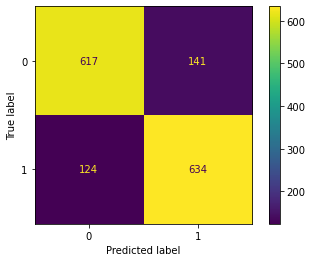

In [37]:
# Confusion metrics for training set
plot_confusion_matrix(full_pipeline_log, X_train_under, y_train_under);

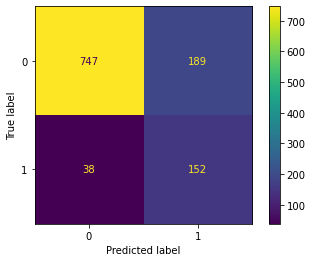

In [38]:
plot_confusion_matrix(full_pipeline_log, X_test, y_test);

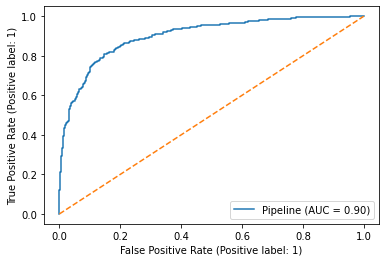

In [39]:
# roc_curve for train
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

plot_roc_curve(full_pipeline_log, X_train_under, y_train_under)
plt.plot([0, 1], [0, 1], linestyle='--');

we can see the good result from AUC score that is 0.93

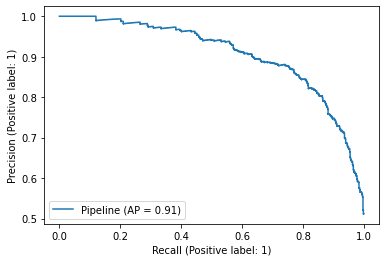

In [40]:
plot_precision_recall_curve(full_pipeline_log, X_train_under, y_train_under);

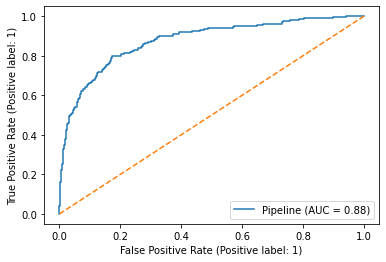

In [41]:
# roc_curve for train
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

plot_roc_curve(full_pipeline_log, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--');

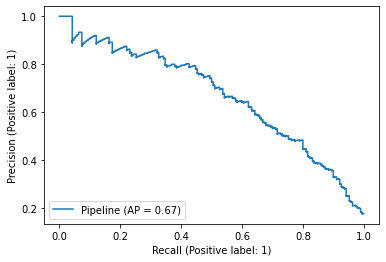

In [42]:
plot_precision_recall_curve(full_pipeline_log, X_test, y_test);

### V. Hyperparameter Tuning Logistic Regression

We try to Tuning our model to get a better result.

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'log_reg__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'log_reg__penalty' : ['none', 'l1', 'l2', 'elasticnet'],
    'log_reg__C' : [1,2, 4, 8, 10, 20, 30, 40] 
}

grid_search = GridSearchCV(full_pipeline_log, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train_under, y_train_under)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_pipeline',
                                        ColumnTransformer(transformers=[('ctg_transformer',
                                                                         OneHotEncoder(),
                                                                         ['PreferredLoginDevice',
                                                                          'PreferredPaymentMode',
                                                                          'Gender',
                                                                          'PreferedOrderCat',
                                                                          'MaritalStatus']),
                                                                        ('num_transformer',
                                                                         RobustScaler(),
                                                                         ['CityTier',
        

In [44]:
log_reg_best = grid_search.best_estimator_
log_reg_best.fit(X_train_under, y_train_under)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('ctg_transformer',
                                                  OneHotEncoder(),
                                                  ['PreferredLoginDevice',
                                                   'PreferredPaymentMode',
                                                   'Gender', 'PreferedOrderCat',
                                                   'MaritalStatus']),
                                                 ('num_transformer',
                                                  RobustScaler(),
                                                  ['CityTier',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'CashbackAmount',
                                         

In [45]:
# score after tuning
log_reg_best.fit(X_train_under,y_train_under)

print('Train set:{}'.format(log_reg_best.score(X_train_under,y_train_under)))
print('Test set:{}'.format(log_reg_best.score(X_test,y_test)));

Train set:0.8232189973614775
Test set:0.8037300177619894


The results before tuning are even better (Train 82%, Test 80%) than the results after tuning (Train 81%, Test 79%), and most likely, will be the same for all results

In [46]:
# clf report for train
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

y_train_log_reg_best = log_reg_best.predict(X_train_under)
clf_report = classification_report(y_train_under,y_train_log_reg_best)
print(clf_report)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       758
           1       0.82      0.83      0.82       758

    accuracy                           0.82      1516
   macro avg       0.82      0.82      0.82      1516
weighted avg       0.82      0.82      0.82      1516



In [47]:
# clf report for test
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report

y_test_log_reg_best = log_reg_best.predict(X_test)
clf_report_log_reg = classification_report(y_test, y_test_log_reg_best)
print(clf_report_log_reg)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       936
           1       0.45      0.80      0.58       190

    accuracy                           0.80      1126
   macro avg       0.70      0.80      0.73      1126
weighted avg       0.87      0.80      0.82      1126



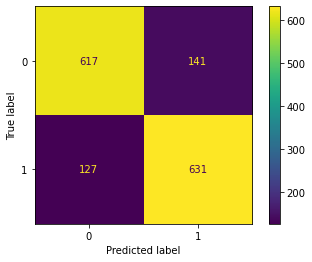

In [48]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

plot_confusion_matrix(log_reg_best, X_train_under, y_train_under);

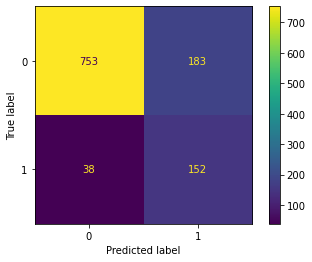

In [49]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

plot_confusion_matrix(log_reg_best, X_test, y_test);

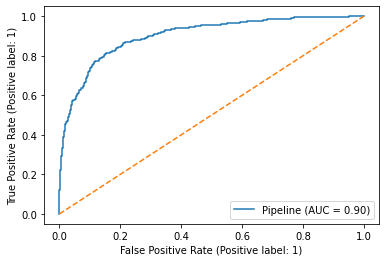

In [50]:
# roc_curve for train
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

plot_roc_curve(log_reg_best, X_train_under, y_train_under)
plt.plot([0, 1], [0, 1], linestyle='--');

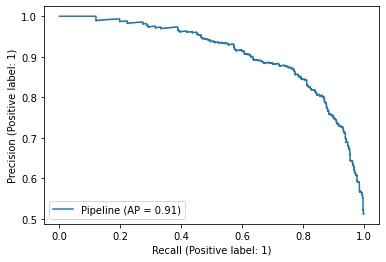

In [51]:
plot_precision_recall_curve(log_reg_best, X_train_under, y_train_under);

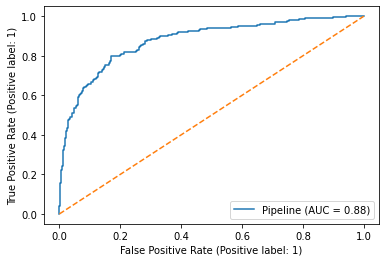

In [52]:
# roc_curve for test

plot_roc_curve(log_reg_best, X_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--');

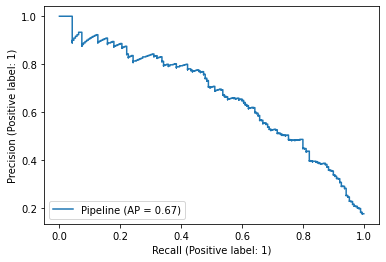

In [53]:
plot_precision_recall_curve(log_reg_best, X_test, y_test);

In [54]:
log_reg_coef = full_pipeline_log.named_steps.log_reg.coef_

feature_name = full_pipeline_log['full_pipeline'].transformers_[0][1].get_feature_names().tolist() + num_cols

df_result_coef = pd.DataFrame({
    'name':feature_name,
    'coef':log_reg_coef.flatten()
})

df_coef = df_result_coef.sort_values('coef')
df_coef

,name,coef
28,Tenure,-2.012141
14,x3_Laptop & Accessory,-1.545401
25,CashbackAmount,-0.823822
16,x3_Mobile Phone,-0.763980
31,DaySinceLastOrder,-0.681126
19,x4_Married,-0.425535
3,x1_CC,-0.423089
9,x1_UPI,-0.251777
6,x1_Credit Card,-0.240353
15,x3_Mobile,-0.240344


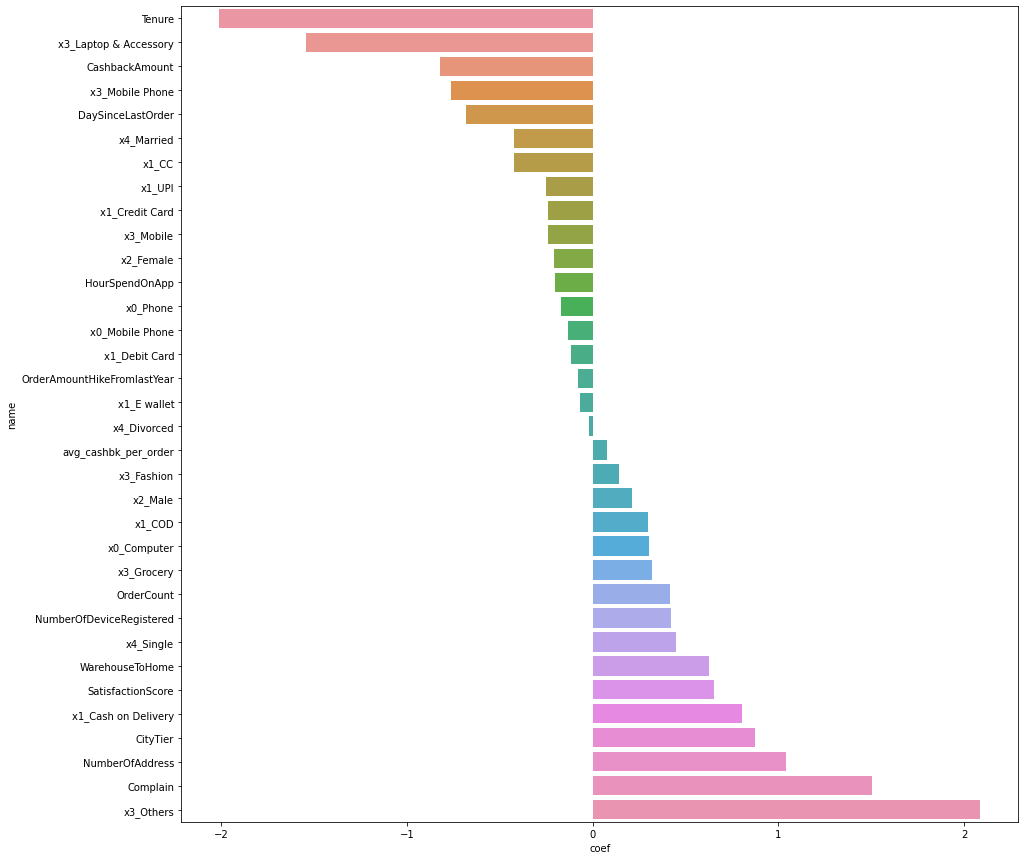

In [55]:
# Generating feature Importance
plt.figure(figsize=(15,15))
sns.barplot(data=df_coef,x='coef',y='name');

According to the model, Tenure is negatively contributes to the churn customer, and conversely, complain has positive influence on the customer churn test score, we can see, customer who send a complain tend to be a churn customer. The other most influental variables are from Prefered Order Categorical, there are Laptop & Accessory and Others

# VI. Result & Conclusion

In this case, to predict which customers will churn, we use the Logistic Regression model, with an accuracy score of 82% for the training set and 80% for the testing set. And in this case, we are very concerned about the recall results, so that the True Positive obtained can be maximized. So that the predicted customer will churn, it can be predicted correctly, and the recall result on our machine learning model is 80%.

Based on feature importance, customers who tend to churn are customers who have complained. Therefore, we suggest to the marketing team to pay more attention to service customers and do discount promos to customers who are predicted to churn.

Based on data from www.statista.com, "Average value of daily customer transaction" each customer has a value of Rp. 300,000.00. And if we assume that the cost of the promotion spends the marketing cost of Rp. 300/customer. Based on our calculations, the company can prevent an income loss of Rp. 34.099.500.

Source : https://www.statista.com/statistics/1242651/indonesia-average-daily-e-commerce-transaction-value/ 